In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense,SimpleRNN,Dropout

In [13]:
train_data=pd.read_csv('Google_Stock_Price_Train.csv')
train_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [14]:
train=train_data.loc[:,['Open']].values
print(train.shape)
print(train)

(1258, 1)
[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [15]:
scaler=MinMaxScaler(feature_range=(0,1))
train_scaled=scaler.fit_transform(train)
print(train_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [16]:
x_train=[]
y_train=[]
timesteps=5
for i in range(timesteps,1258):
    x_train.append(train_scaled[i-timesteps:i])
    y_train.append(train_scaled[i])
x_train,y_train=np.array(x_train),np.array(y_train)
print(x_train)
                   

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  [0.09156187]
  [0.07984225]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  [0.07984225]
  [0.0643277 ]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  [0.0643277 ]
  [0.0585423 ]]

 ...

 [[0.96294367]
  [0.96123223]
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.96123223]
  [0.95475854]
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.95475854]
  [0.95204256]
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


In [19]:
model=Sequential()
model.add(SimpleRNN(units=100,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(SimpleRNN(units=100,activation='relu',return_sequences=True))
model.add(SimpleRNN(units=100,activation='relu',return_sequences=True))
model.add(SimpleRNN(units=100))
model.add(Dense(units=1))



In [20]:
model.compile(optimizer='adam',loss='mse')
model.fit(x_train,y_train,epochs=10,batch_size=1)

Epoch 1/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.0059
Epoch 2/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.0015
Epoch 3/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0018
Epoch 4/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 9.9451e-04
Epoch 5/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 7.8154e-04
Epoch 6/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0014
Epoch 7/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 8.6090e-04
Epoch 8/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0017
Epoch 9/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 8.1609e-04
Epoch 10/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 6.5112e-04


In [21]:
test_data=pd.read_csv('Google_Stock_Price_Test.csv')
test_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [22]:
test=test_data.loc[:,['Open']].values
print(test.shape)
print(test)

(20, 1)
[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


In [23]:
data_total=pd.concat((train_data['Open'],test_data['Open']),axis=0)
inputs=data_total[len(data_total)-len(test_data)-timesteps:].values.reshape(-1,1)
print(inputs)
inputs=scaler.transform(inputs)

[[790.9 ]
 [790.68]
 [793.7 ]
 [783.33]
 [782.75]
 [778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


In [24]:
x_test=[]
for i in range(timesteps,70):
    if len(inputs[i-timesteps:i])==timesteps:
        x_test.append(inputs[i-timesteps:i])
x_test=np.array(x_test)
pred_stock_price=model.predict(x_test)
pred_stock_price=scaler.inverse_transform(pred_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [25]:
print(pred_stock_price)

[[757.08704]
 [754.4405 ]
 [763.24615]
 [760.3549 ]
 [767.6528 ]
 [776.7363 ]
 [778.55334]
 [774.6051 ]
 [777.39044]
 [779.34424]
 [779.0454 ]
 [777.49414]
 [777.2047 ]
 [778.9414 ]
 [779.25934]
 [791.88007]
 [798.0138 ]
 [804.235  ]
 [800.57355]
 [784.1882 ]
 [769.9371 ]]


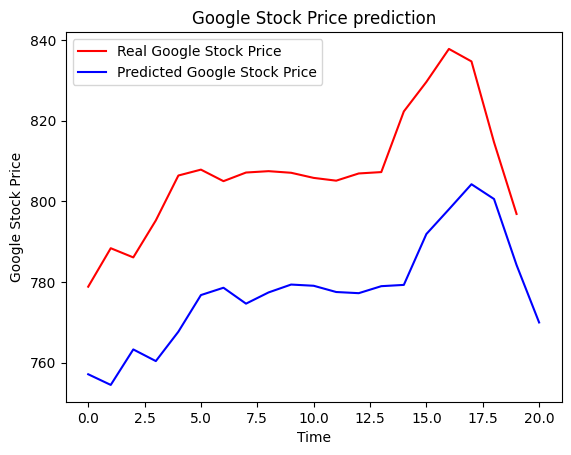

In [27]:
# visualising the results
plt.plot(test, color = "red", label = "Real Google Stock Price")
plt.plot(pred_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()